In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [33]:
# sample_data = pd.read_excel('./assets/sample_data_1.xlsx', sheet_name="X bar and R chart")
sample_data = pd.read_excel('./assets/sample_data_1.xlsx', sheet_name="C chart")
sample_data.info()
sample_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sample  10 non-null     int64
 1   1       10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


,Sample,1
0,1,3
1,2,5
2,3,2
3,4,5
4,5,9


In [34]:
## is data discrete or continuous?
i = 0
num_col = len(sample_data.columns) - 1
flag_conti = True
while i < num_col:
    if (sample_data[i+1]%1 == 0).all():
        flag_conti = False
    i+=1
if flag_conti:
    print("Data is continuous")
    ## is there more than one data per subgroup?
    flag_subgroup = False
    num_col = len(sample_data.columns) - 1
    if num_col > 1 :
        flag_subgroup = True
        if num_col > 10:
            print("Data will use 'X bar & S chart'")
        else:
            print("Data will use 'X bar & R chart'")
    else:
        print("Data will use 'XmR chart'")
else:
    print("Data is discrete")
    ## does data follow Poisson distribution or Binomial 
    flag_poisson = False
    mean = round(sample_data[1].mean(),0)
    var = round((sample_data[1].var()),0)
    if(mean == var):
        flag_poisson = True
        print("Data will use either 'C chart' or 'U chart'") ##left differentiation
    else:
        print("Data will use 'P chart'")

Data is discrete
Data will use either 'C chart' or 'U chart'


In [12]:
## now that we know what chart to use for what type of data, let's create the respective charts

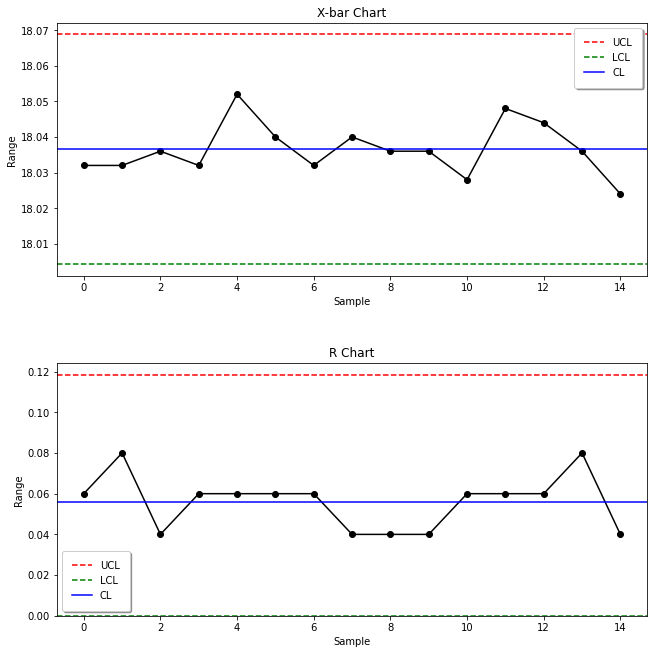

In [13]:
## for x bar & r chart

x = np.array(sample_data.iloc[:,1:].to_numpy())  
## Define list variable for groups means
x_bar = []
## Define list variable for groups ranges
r = [] 
## Get and append groups means and ranges
for group in x:
    x_bar.append(round(group.mean(),3))
    r.append(round(group.max() - group.min(),3))
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(10,10))

## select appropriate constant value
constants = pd.read_excel('./assets/control_charts_constants.xlsx', sheet_name="Sheet1")
sample_size = len(sample_data.columns) - 1
A2 = constants.loc[constants['m'] == sample_size]['A2']
A2 = float(A2)
D4 = constants.loc[constants['m'] == sample_size]['D4']
D4 = float(D4)
D3 = constants.loc[constants['m'] == sample_size]['D3']
D3 = float(D3)

## x-bar chart
# axs[0].plot(x_bar, linestyle='-', marker='o', markersize=10, color='black', linewidth=2)
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed', label='UCL')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='green', linestyle='dashed', label='LCL')
axs[0].axhline((statistics.mean(x_bar)), color='blue', label='CL')
axs[0].set_title('X-bar Chart')
axs[0].set(xlabel='Sample', ylabel='Range')
axs[0].legend(fancybox=True, framealpha=1, shadow=True,frameon=True, borderpad=1)

## R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed', label='UCL')
axs[1].axhline((D3*statistics.mean(r)), color='green', linestyle='dashed', label='LCL')
axs[1].axhline((statistics.mean(r)), color='blue', label='CL')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Sample', ylabel='Range')
axs[1].legend(fancybox=True, framealpha=1, shadow=True,frameon=True, borderpad=1)

fig.tight_layout(pad=4)

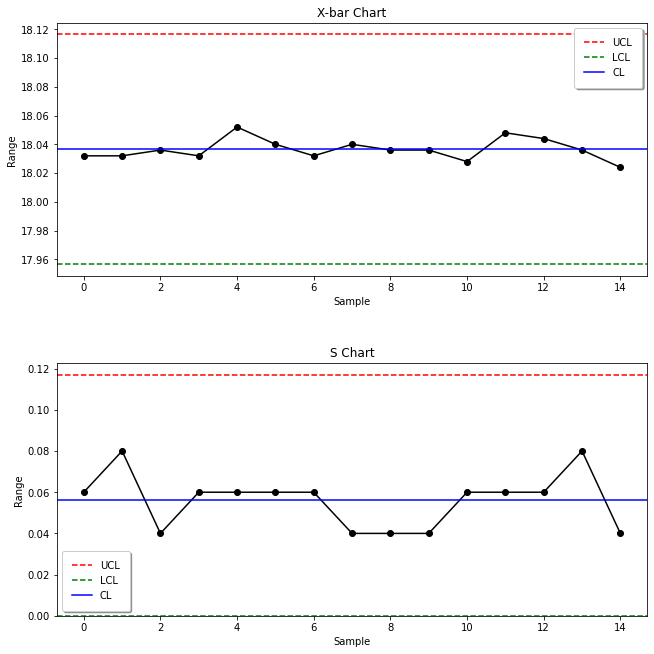

In [14]:
## x bar and S chart

x = np.array(sample_data.iloc[:,1:].to_numpy())  
## Define list variable for groups means
x_bar = []
## Define list variable for groups ranges
s = [] 
## Get and append groups means and ranges
for group in x:
    x_bar.append(round(group.mean(),3))
    s.append(round(group.max() - group.min(),3))
## Plot x-bar and S charts
fig, axs = plt.subplots(2, figsize=(10,10))

## select appropriate constant value
constants = pd.read_excel('./assets/control_charts_constants.xlsx', sheet_name="Sheet1")
sample_size = len(sample_data.columns) - 1
A3 = constants.loc[constants['m'] == sample_size]['A3']
A3 = float(A3)
B4 = constants.loc[constants['m'] == sample_size]['B4']
B4 = float(B4)
B3 = constants.loc[constants['m'] == sample_size]['B3']
B3 = float(B3)

## x-bar chart
# axs[0].plot(x_bar, linestyle='-', marker='o', markersize=10, color='black', linewidth=2)
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A3*statistics.mean(r)), color='red', linestyle='dashed', label='UCL')
axs[0].axhline((statistics.mean(x_bar)-A3*statistics.mean(r)), color='green', linestyle='dashed', label='LCL')
axs[0].axhline((statistics.mean(x_bar)), color='blue', label='CL')
axs[0].set_title('X-bar Chart')
axs[0].set(xlabel='Sample', ylabel='Range')
axs[0].legend(fancybox=True, framealpha=1, shadow=True,frameon=True, borderpad=1)
## S chart
axs[1].plot(s, linestyle='-', marker='o', color='black')
axs[1].axhline((B4*statistics.mean(r)), color='red', linestyle='dashed', label='UCL')
axs[1].axhline((B3*statistics.mean(r)), color='green', linestyle='dashed', label='LCL')
axs[1].axhline((statistics.mean(r)), color='blue', label='CL')
axs[1].set_ylim(bottom=0)
axs[1].set_title('S Chart')
axs[1].set(xlabel='Sample', ylabel='Range')
axs[1].legend(fancybox=True, framealpha=1, shadow=True,frameon=True, borderpad=1)

fig.tight_layout(pad=4)

,Sample,1
0,1,3
1,2,5
2,3,2
3,4,5
4,5,9
5,6,4
6,7,5
7,8,2
8,9,5
9,10,3


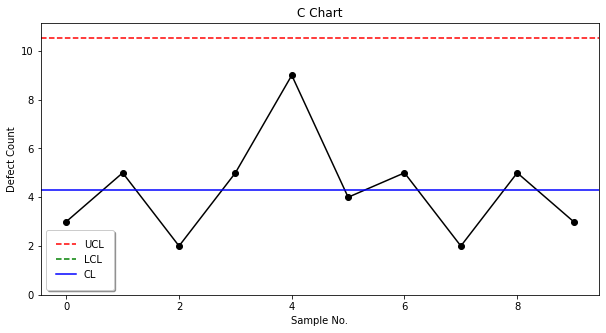

In [35]:
## for c chart

c = sample_data
# Plot c-chart
plt.figure(figsize=(10,5))
plt.plot(c[1], linestyle='-', marker='o', color='black')
plt.axhline(statistics.mean(c[1])+3*np.sqrt(statistics.mean(c[1])), color='red', linestyle='dashed', label='UCL')
plt.axhline(statistics.mean(c[1])-3*np.sqrt(statistics.mean(c[1])), color='green', linestyle='dashed', label='LCL')
plt.axhline(statistics.mean(c[1]), color='blue', label='CL')
plt.ylim(bottom=0)
plt.title('C Chart')
plt.xlabel('Sample No.')
plt.ylabel('Defect Count')
plt.legend(fancybox=True, framealpha=1, shadow=True,frameon=True, borderpad=1)
c